In [187]:
#importing required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sb

In [188]:
data = pd.read_csv(r"/content/Future tale hotel reservation.csv")

In [189]:
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_cancelled
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,2,10/2/2017,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,6,11/6/2018,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,28,2/28/2018,Online,0,0,0,60.00,0,Canceled,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,20,5/20/2018,Online,0,0,0,100.00,0,Canceled,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,11,4/11/2018,Online,0,0,0,94.50,0,Canceled,1
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,...,13,9/13/2018,Online,0,0,0,115.00,1,Canceled,1
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,...,15,10/15/2017,Online,0,0,0,107.55,1,Not_Canceled,0
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,...,26,12/26/2018,Online,0,0,0,105.61,1,Not_Canceled,0
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,...,6,7/6/2018,Offline,0,0,0,96.90,1,Not_Canceled,0
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,...,18,10/18/2018,Online,0,0,0,133.44,3,Not_Canceled,0


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  month          

In [191]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [192]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
month                                   0
arrival_date                            0
date                                    0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
is_cancelled                            0
dtype: int64

In [193]:
data.duplicated().sum()

0

In [194]:
df = data.copy()

In [195]:
df.drop('Booking_ID', axis=1, inplace=True)

In [196]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,arrival_date,date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_cancelled
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,...,2,10/2/2017,Offline,0,0,0,65.00,0,Not_Canceled,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,...,6,11/6/2018,Online,0,0,0,106.68,1,Not_Canceled,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,...,28,2/28/2018,Online,0,0,0,60.00,0,Canceled,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,...,20,5/20/2018,Online,0,0,0,100.00,0,Canceled,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,...,11,4/11/2018,Online,0,0,0,94.50,0,Canceled,1


In [197]:
# Select numerical features only
num = data.select_dtypes(include=['int', 'float'])

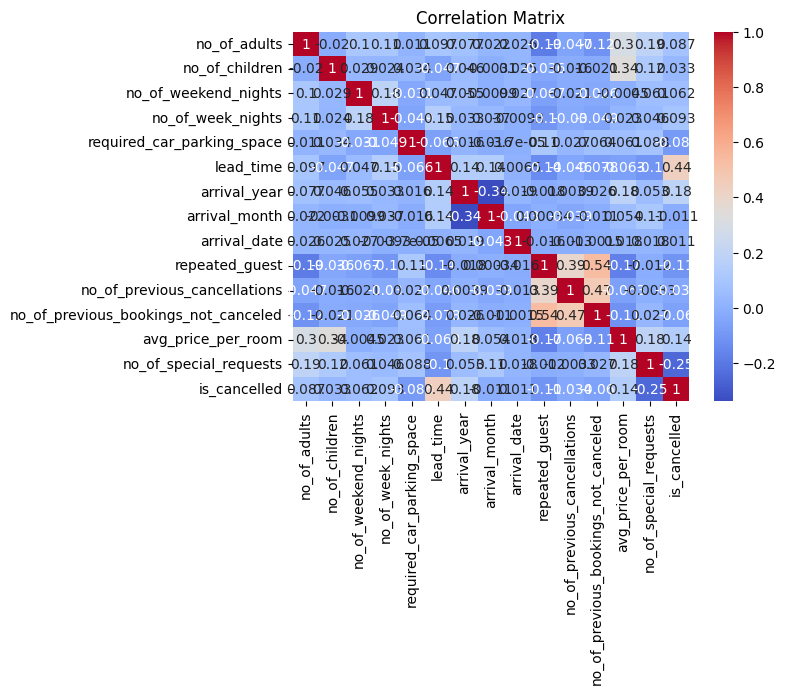

<Figure size 3000x3000 with 0 Axes>

In [198]:
# Explore correlations between numerical variables using a correlation matrix
correlation_matrix = num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.figure(figsize=(30, 30))
plt.show()

In [199]:
# Select numerical features only
obj = data.select_dtypes(include=['object'])

In [200]:
!pip install dython

In [201]:
import pandas as pd

# Preprocess the data
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_year'] = df['arrival_date'].dt.year
df['arrival_month'] = df['arrival_date'].dt.month
df['arrival_day'] = df['arrival_date'].dt.day
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']


In [202]:
df['month']

0        Oct
1        Nov
2        Feb
3        May
4        Apr
        ... 
36270    Aug
36271    Oct
36272    Jul
36273    Apr
36274    Dec
Name: month, Length: 36275, dtype: object

In [203]:
categorical_columns = obj.select_dtypes(include=['object']).columns

In [204]:
categorical_columns

Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'month',
       'date', 'market_segment_type', 'booking_status'],
      dtype='object')

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the cancellation rate
cancel_rate = df['is_cancelled'].mean()
print(f"Cancellation rate: {cancel_rate:.2%}")

Cancellation rate: 32.76%


**This can help identify any patterns or trends that may be relevant for further analysis and modeling.**

<Figure size 1200x700 with 0 Axes>

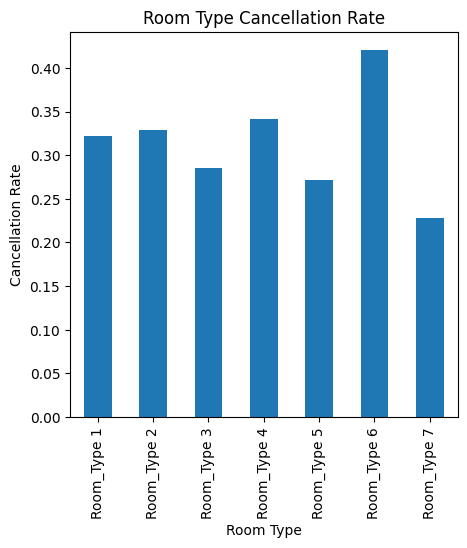

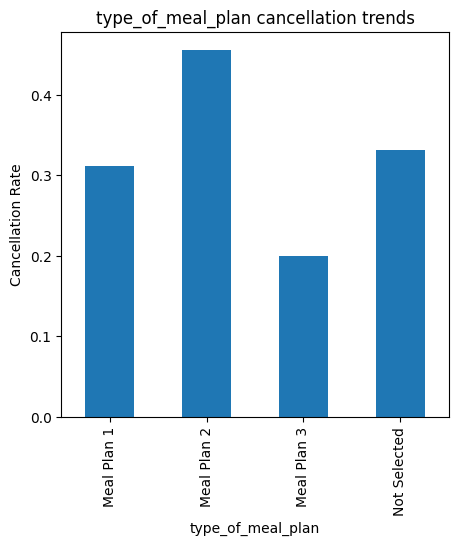

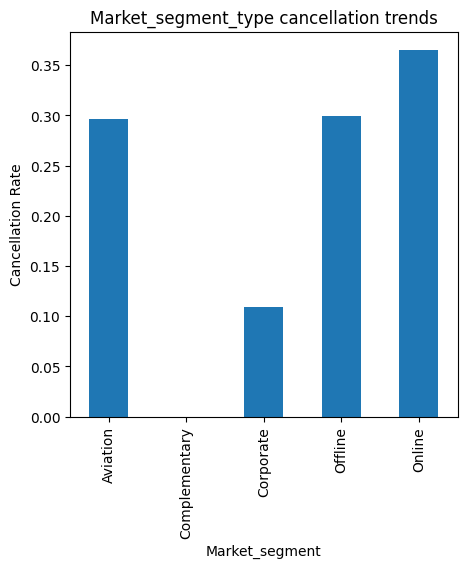

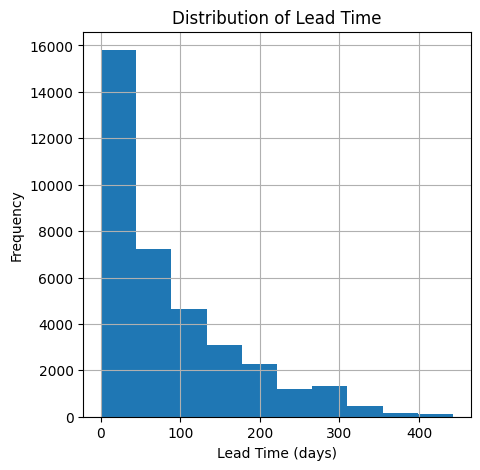

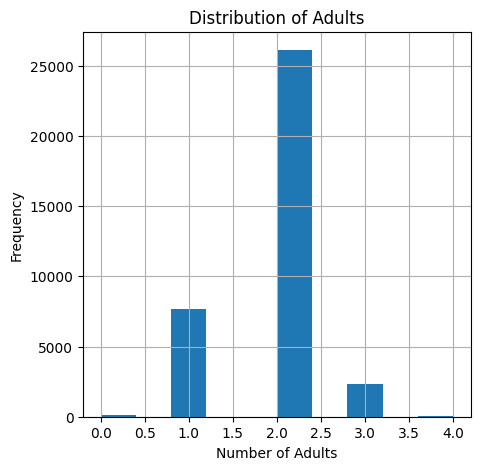

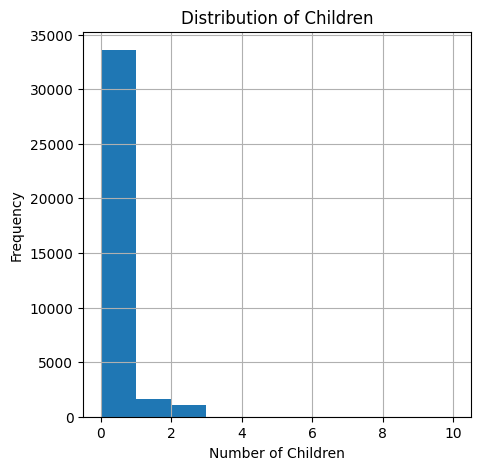

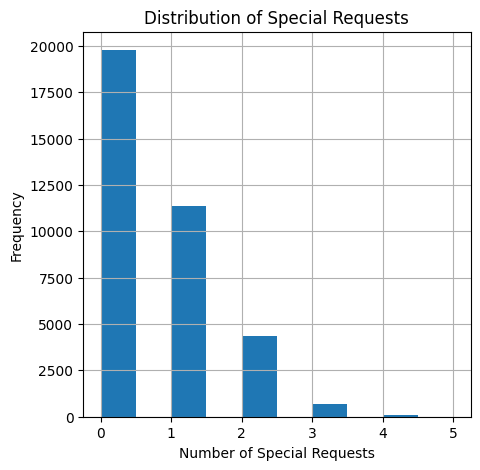

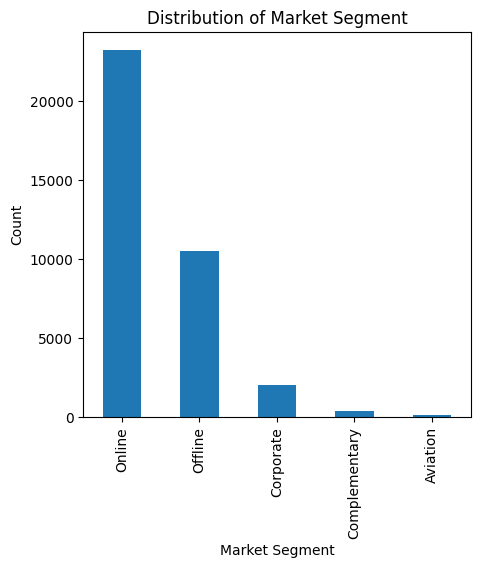

In [206]:
# Plot the room type cancellation trends
plt.figure(figsize=(12, 7))

# Plot the room type cancellation trends
#A bar chart that shows the cancellation rate for each room type, which can help identify the room types with higher or lower cancellation rates.
fig, ax = plt.subplots(figsize=(5, 5))
room_type_cancels = df.groupby('room_type_reserved')['is_cancelled'].mean()
room_type_cancels.plot(kind='bar', ax=ax)
ax.set_title('Room Type Cancellation Rate')
ax.set_xlabel('Room Type')
ax.set_ylabel('Cancellation Rate')
plt.show()


# Plot the market_segment_type cancellation trends
fig, ax = plt.subplots(figsize=(5, 5))
room_type_cancels = df.groupby('type_of_meal_plan')['is_cancelled'].mean()
room_type_cancels.plot(kind='bar', ax=ax)
ax.set_title('type_of_meal_plan cancellation trends')
ax.set_xlabel('type_of_meal_plan')
ax.set_ylabel('Cancellation Rate')
plt.show()

# Plot the market_segment_type cancellation trends
fig, ax = plt.subplots(figsize=(5, 5))
room_type_cancels = df.groupby('market_segment_type')['is_cancelled'].mean()
room_type_cancels.plot(kind='bar', ax=ax)
ax.set_title('Market_segment_type cancellation trends')
ax.set_xlabel('Market_segment')
ax.set_ylabel('Cancellation Rate')
plt.show()

# Plot the distribution of lead time
fig, ax = plt.subplots(figsize=(5, 5))
df['lead_time'].hist(ax=ax)
ax.set_title('Distribution of Lead Time')
ax.set_xlabel('Lead Time (days)')
ax.set_ylabel('Frequency')
plt.show()

# Plot the distribution of adults
fig, ax = plt.subplots(figsize=(5, 5))
df['no_of_adults'].hist(ax=ax)
ax.set_title('Distribution of Adults')
ax.set_xlabel('Number of Adults')
ax.set_ylabel('Frequency')
plt.show()

# Plot the distribution of children
fig, ax = plt.subplots(figsize=(5, 5))
df['no_of_children'].hist(ax=ax)
ax.set_title('Distribution of Children')
ax.set_xlabel('Number of Children')
ax.set_ylabel('Frequency')
plt.show()
# Plot the distribution of special requests
fig, ax = plt.subplots(figsize=(5, 5))
df['no_of_special_requests'].hist(ax=ax)
ax.set_title('Distribution of Special Requests')
ax.set_xlabel('Number of Special Requests')
ax.set_ylabel('Frequency')
plt.show()

# Plot the distribution of market segment
fig, ax = plt.subplots(figsize=(5, 5))
df['market_segment_type'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Distribution of Market Segment')
ax.set_xlabel('Market Segment')
ax.set_ylabel('Count')
plt.show()

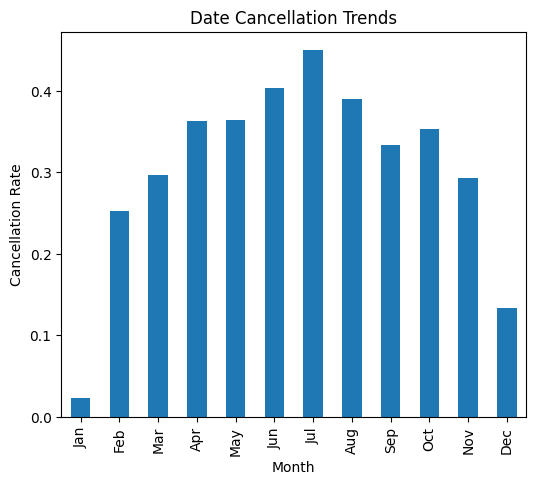

In [207]:
# Convert the month column to a categorical type with the correct order
df['month'] = pd.Categorical(df['month'], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], ordered=True)

# Group by month and calculate the mean of cancellations
room_type_cancels = df.groupby('month')['is_cancelled'].mean()

# Plot the results
fig, ax = plt.subplots(figsize=(6, 5))
room_type_cancels.plot(kind='bar', ax=ax)
ax.set_title('Date Cancellation Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Cancellation Rate')
plt.show()

In [208]:
df['month']

0        Oct
1        Nov
2        Feb
3        May
4        Apr
        ... 
36270    Aug
36271    Oct
36272    Jul
36273    Apr
36274    Dec
Name: month, Length: 36275, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [209]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']]
y = df['is_cancelled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Cancellation prediction model performance:")
print(f"Accuracy: {model.score(X_test, y_test):.2%}")

Cancellation prediction model performance:
Accuracy: 77.82%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [210]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(f"Decision Tree Classifier Accuracy: {model.score(X_test, y_test):.2%}")


Decision Tree Classifier Accuracy: 84.56%


In [211]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Random Forest Classifier Accuracy: {model.score(X_test, y_test):.2%}")

Random Forest Classifier Accuracy: 86.78%


In [212]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(f"XGBoost Classifier Accuracy: {model.score(X_test, y_test):.2%}")

XGBoost Classifier Accuracy: 86.30%


In [213]:
# Create and train the Gradient Boosting Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model on the test set
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.2%}")

Gradient Boosting Classifier Accuracy: 83.03%


In [214]:
# Create and train the Neural Network model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the model on the test set
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)
print(f"Neural Network Classifier Accuracy: {nn_accuracy:.2%}")

Neural Network Classifier Accuracy: 79.68%


**Additional Analyses and Recommendations**

Analyze Room Type Profitability

In [215]:
df['revenue'] = df['avg_price_per_room'] * df['total_nights']
room_type_revenue = df.groupby('room_type_reserved')['revenue'].mean()
print("Average revenue per room type:")
print(room_type_revenue)

Average revenue per room type:
room_type_reserved
Room_Type 1    277.082392
Room_Type 2    288.812240
Room_Type 3    238.071429
Room_Type 4    429.971436
Room_Type 5    367.741547
Room_Type 6    584.935973
Room_Type 7    535.378734
Name: revenue, dtype: float64


**Recommendations**

Implement Dynamic Pricing Strategies for room types with high cancellation rates,(room_type_6) and implement dynamic pricing strategies to improve revenue.

Develop Targeted Marketing Strategies : identify Customer segments with low cancellation rates (complementary & cooperate) and develop targeted marketing strategies to attract these customers.